# 1. Defining The Question.

### a) Specifying the Question





As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

Determining the model that will give me the most accurate prediction for the prices of the houses.

### c) Understanding the context

Real estate is property consisting of land and the buildings on it, along with its natural resources such as crops, minerals or water; immovable property of this nature; an interest vested in this (also) an item of real property, (more generally) buildings or housing in general.
There are alot of factors that are considered before a prospecive buyer buys a house, such as location, size of the house, number of bedrooms and more of the features the house has.

### d) Recording the Experimental Design



> The following are the experimental design i took in order to complete this project:


*   Importing all the necessary libraries
*   Loading the datasets
*    Reading, tyding and merging the dataset  
*  Exploratory Data Analysis
*  Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression





### e) Data Relevance

Our house data is the most appropriate to use in our predictions since its columns contains only numerical values.

# 2. Reading The Data.

In [0]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#reading our data
house_data= pd.read_csv("/content/house_data.csv")

# 3. Checking The Data.

In [0]:
# Determining the no. of records in our datasets
house_data.shape

(21613, 20)

In [0]:
# columns in our data set
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Previewing the top of our dataset
house_data.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# previewing the last observations of the data
house_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# checking for null values
house_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# checking for duplicates
house_data.duplicated().sum()

3

In [0]:
# Checking whether each column has an appropriate datatype
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

# 5. Tidying the Dataset

In [0]:
#dropping the duplicates
house_data = house_data.drop_duplicates(keep = 'first')

In [0]:
# confirming if the duplicates have been dropped
house_data.duplicated().any()

False

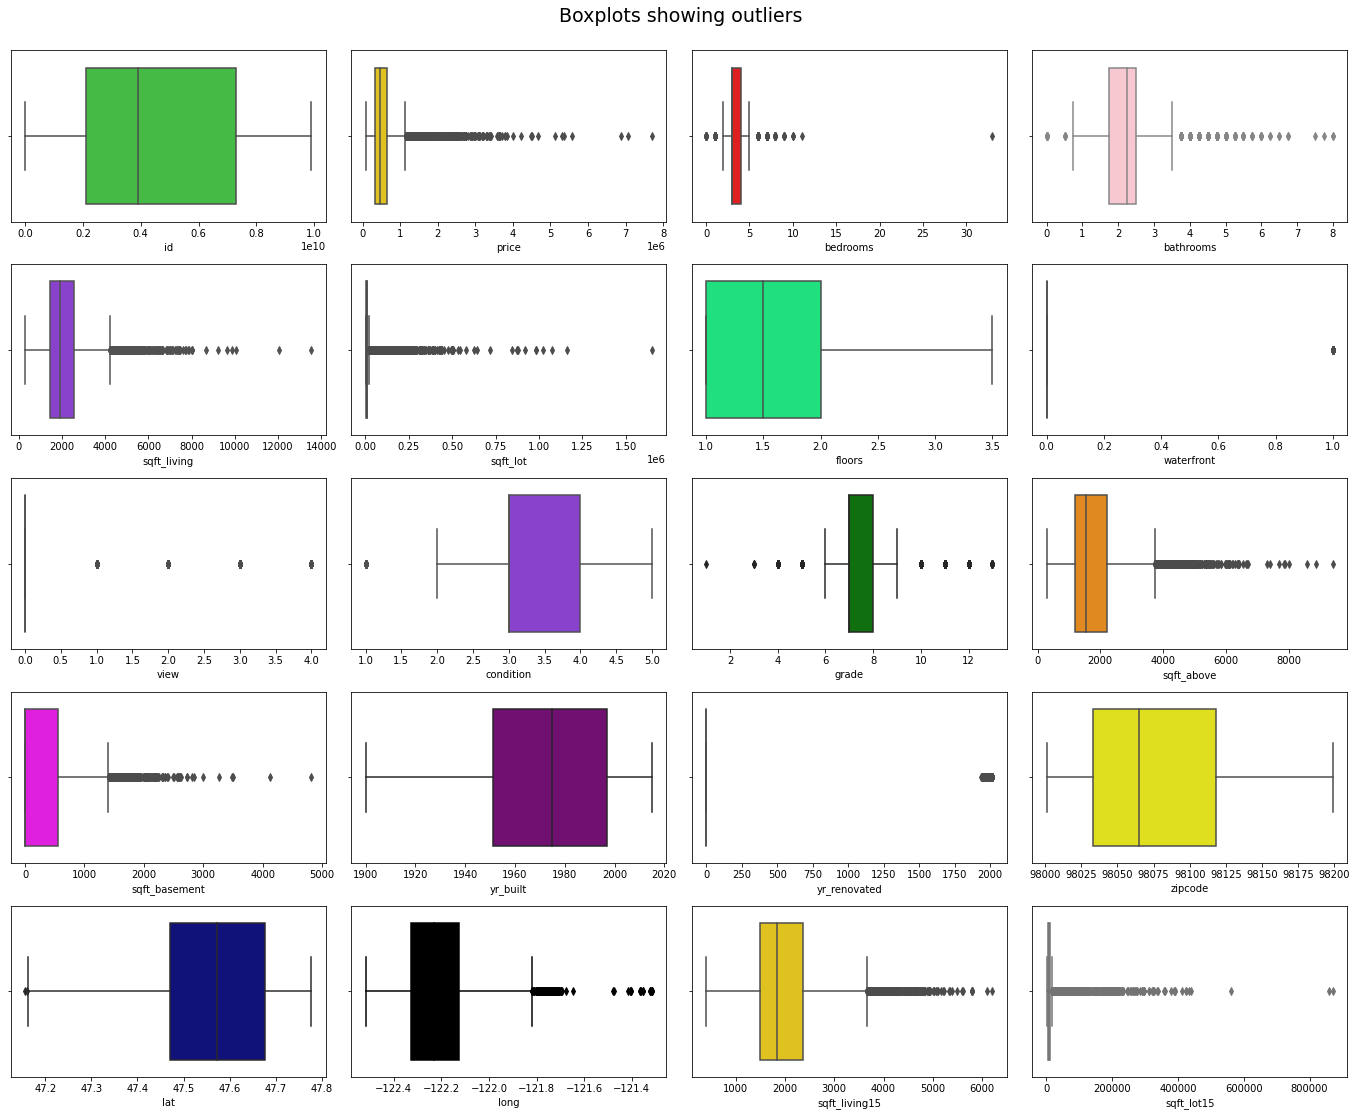

In [0]:
# checking for outliers
fig, axes = plt.subplots(nrows =5, ncols = 4, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'pink', 'blueviolet','darkorange','springgreen','red','fuchsia','blueviolet','green','darkorange','magenta', 'purple', 'orange','yellow','darkblue', 'black', 'gold', 'silver']
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), house_data, columns, colors):
    sns.boxplot(house_data[column], ax = ax, color = color)
plt.tight_layout()

There is nothing much we can do with our outliers since they contain necessary values for our predictions.

# 6. Exploratory Analysis

### Univariate Analysis

In [0]:
#this shows the descriptive statistics of the dataset
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


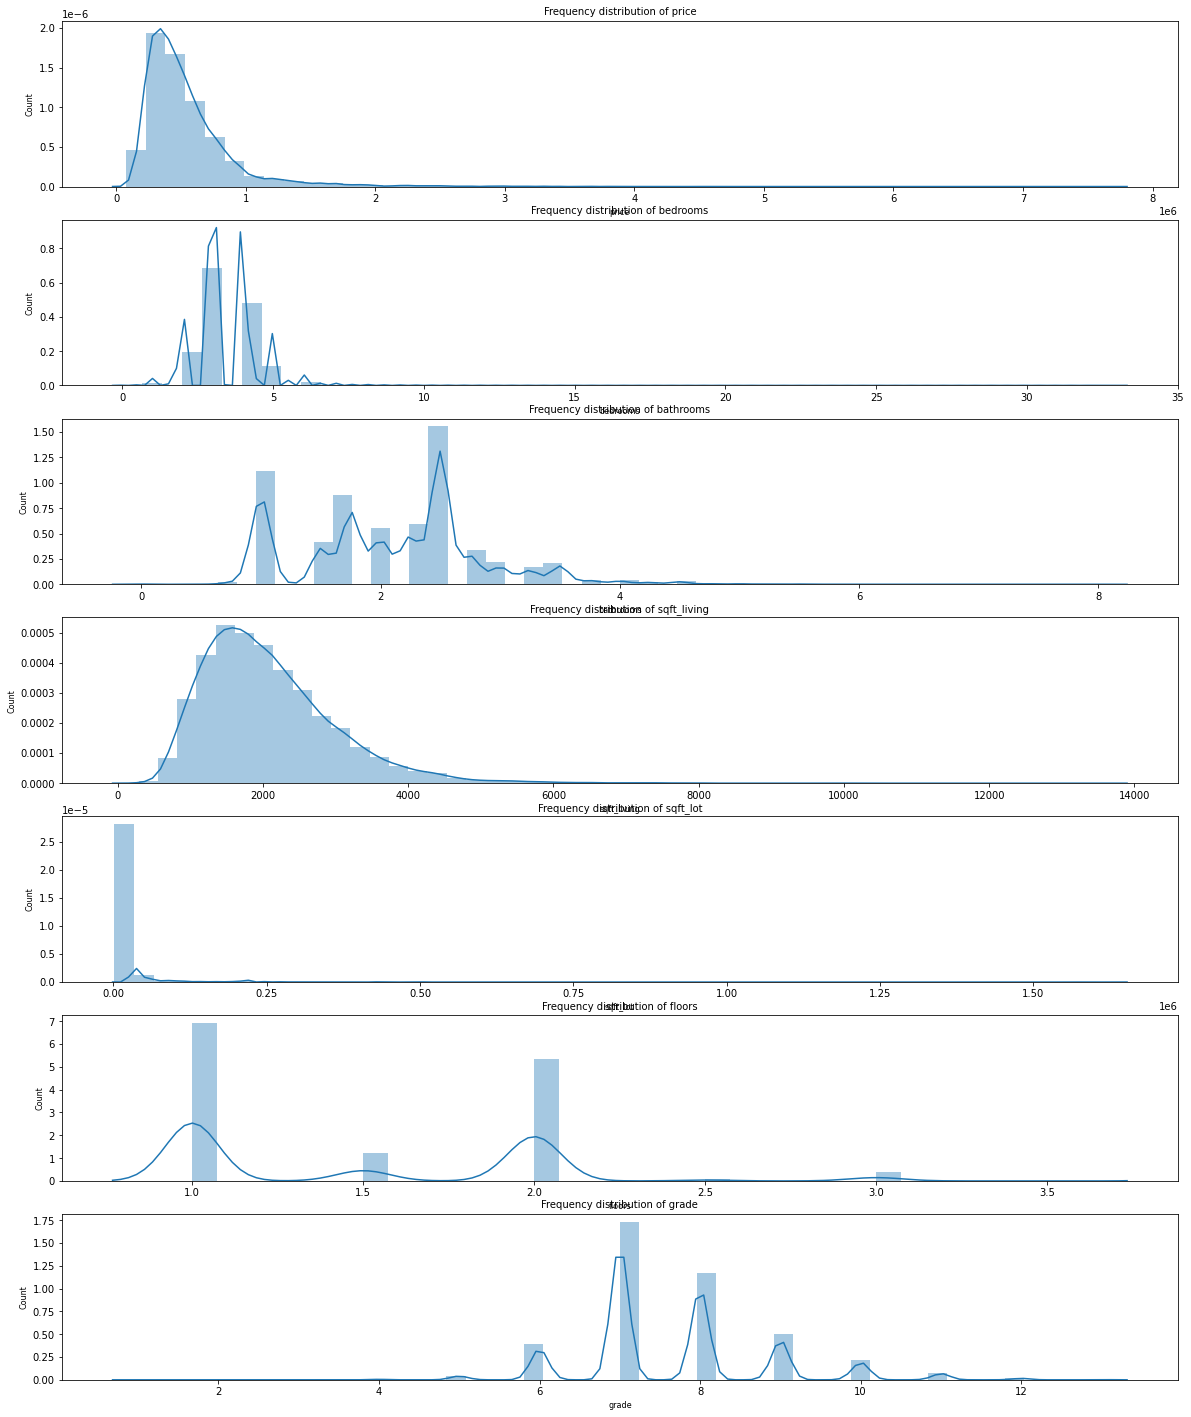

In [0]:
# distribution of numerical variables.
col_names = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']
fig, ax = plt.subplots(len(col_names), figsize=(20,25))

for i, col_val in enumerate(col_names):

    sns.distplot(house_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

### Bivariate Analysis

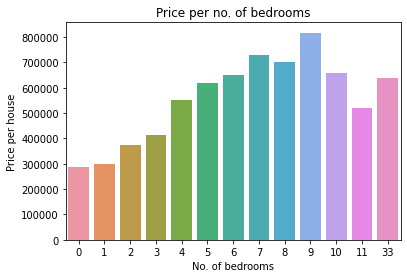

In [0]:
# drawing of price vs bedrooms

ax = sns.barplot(x = 'bedrooms', y = 'price', data=house_data, ci=None, estimator=np.median)
ax.set(xlabel='No. of bedrooms',
       ylabel='Price per house',
       title='Price per no. of bedrooms')
plt.show()

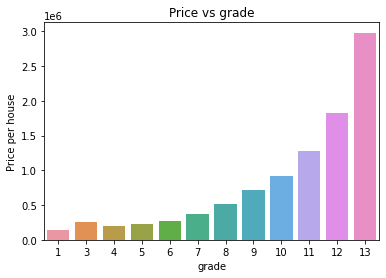

In [0]:
# drawing of price vs grade

ax = sns.barplot(x = 'grade', y = 'price', data=house_data, ci=None, estimator=np.median)
ax.set(xlabel='grade',
       ylabel='Price per house',
       title='Price vs grade')
plt.show()

In [0]:
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

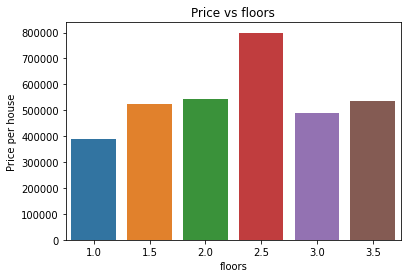

In [0]:
# drawing of price vs floors

ax = sns.barplot(x = 'floors', y = 'price', data=house_data, ci=None, estimator=np.median)
ax.set(xlabel='floors',
       ylabel='Price per house',
       title='Price vs floors')
plt.show()

Text(0.5, 1.0, 'Price vs Living Area')

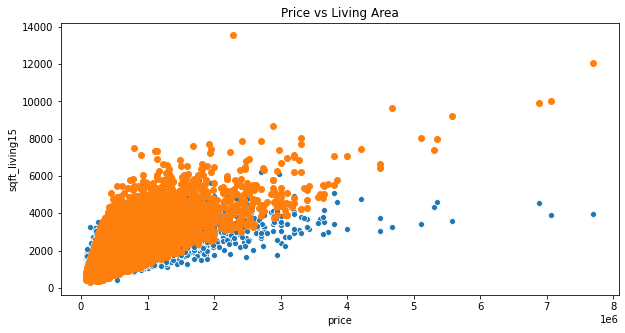

In [0]:
#scatterplt to show price vs living15
x= house_data['sqft_living15']
y=house_data['price']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(house_data.price, house_data.sqft_living)
plt.title('Price vs Living Area')

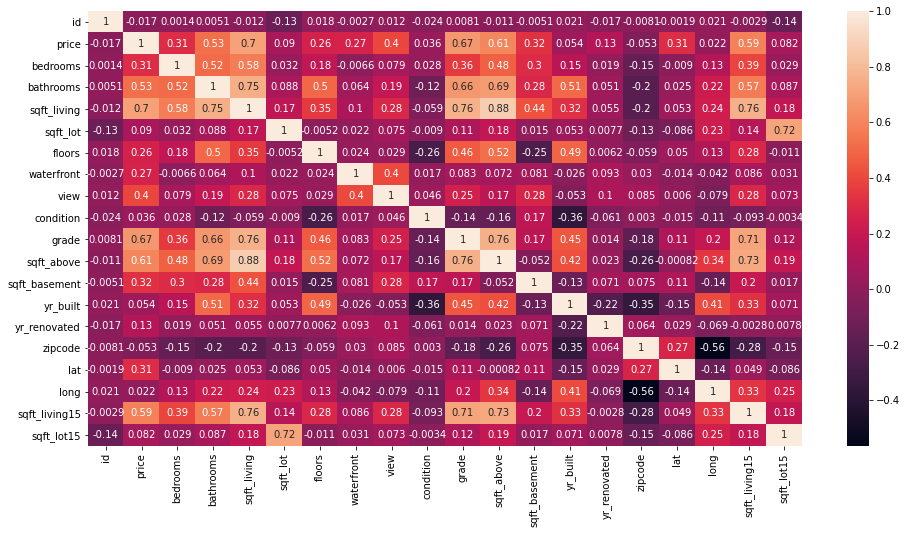

In [0]:
#visualizing the correlation between features
plt.figure(figsize=(16, 8))
corr = house_data.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

From the above heatmap we see that bedrooms, bathrooms, sqft_living, 
floors, waterfront, view, grade, sqft_above, sqft_basement and sqft_living15 have a correlation of above 0.3 to price of the house

### Multivariate Analysis



> Principal component analysis (PCA)



In [0]:
#Separating features and labels /preprocessing
X = house_data[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', ]].values
y = house_data['price']


In [0]:
#Split the data into a training set and testing set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# checking the explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.65994470e-01, 1.56317419e-01, 1.21394134e-01, 6.98279465e-02,
       5.95138262e-02, 5.16830083e-02, 2.70264194e-02, 2.45270216e-02,
       2.37157554e-02, 9.78239483e-33])

# 7. Implementing the Solution

### Normality Tests

QQ plots

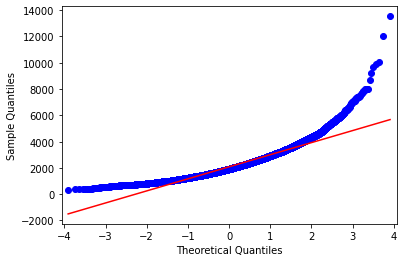

Statistics=0.9150, p=0.0000
Sample does not look Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
#Q-Q Plot for sqft_living
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

qqplot(house_data['sqft_living'], line='s')
pyplot.show()
stat, p = shapiro(house_data['sqft_living'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

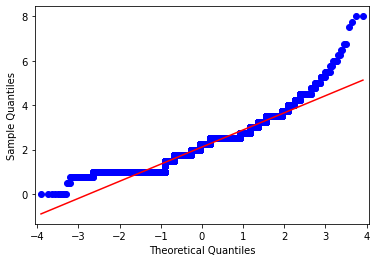

Statistics=0.9368, p=0.0000
Sample does not look Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
#qq plot for bathrooms
qqplot(house_data['bathrooms'], line='s')
pyplot.show()
stat, p = shapiro(house_data['bathrooms'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

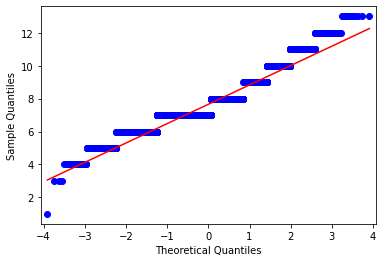

Statistics=0.8953, p=0.0000
Sample does not look Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [0]:
#Q-Q Plot for grade

qqplot(house_data['grade'], line='s')
pyplot.show()
stat, p = shapiro(house_data['grade'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

### 1. Multiple Linear Regression

In [0]:
# Defining our x and y
X = house_data[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', ]].values
y = house_data['price']

In [0]:
# splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
 
#Making Predictions
 
y_pred = regressor.predict(X_test)


In [0]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 153490.452755579
Mean Squared Error: 57124654529.36715
Root Mean Squared Error: 239007.64533664432


The Mean Squared Error is 57124654529.36715 which is our baseline regression model

In [0]:
# calculating the r score
from sklearn.metrics import r2_score
l = r2_score(y_test, y_pred)
l

0.5966148451406035

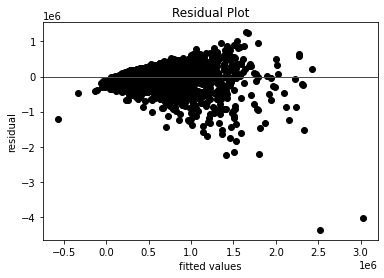

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y =residuals.mean(), color='red', linewidth=1)
plt.show()

In [0]:
# assess the heteroskedasticity using Barlett's test.


import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data
# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### 2. Quantile Regression

In [0]:
## preparing the data
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15',]


for i,colval in enumerate(features):
  x = np.array(house_data[colval].values.reshape(-1,1))
  Y = np.array(house_data['price'])

 # We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=10)
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('Y ~ x', house_data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.1981
Model:                       QuantReg   Bandwidth:                   3.218e+04
Method:                 Least Squares   Sparsity:                    4.715e+05
Date:                Sun, 07 Jun 2020   No. Observations:                21610
Time:                        17:32:28   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.058e+04   4917.275      2.151      0.031     938.701    2.02e+04
x            240.3846      2.340    102.730      0.000     235.798     244.971

The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [0]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1     66.666663  146.666667      144.370101      148.963232
1  0.2 -14325.862069  178.534483      175.703273      181.365693
2  0.3 -20500.000000  207.142857      203.523447      210.762267
3  0.4 -10000.000004  226.415094      222.252723      230.577466
4  0.5  10576.923087  240.384615      235.798127      244.971104
5  0.6  35798.816568  251.479290      246.789110      256.169470
6  0.7  43152.173916  277.173913      271.319786      283.028040
7  0.8  29000.000001  327.067669      319.597117      334.538222
8  0.9 -54789.473675  452.631579      440.513954      464.749204


Mean squared error: 88717793910.03
Variance score: 0.34


Text(0.5, 1.0, 'predictors of price')

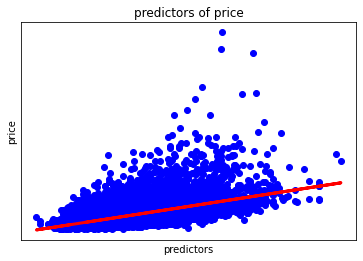

In [0]:
## Let's now trying to fit a linear regression

mod = LinearRegression(fit_intercept = True, normalize = False)
mod.fit(x,Y)

Y_predict = mod.predict(x)


print("Mean squared error: {0:.2f}"
    .format(np.mean((Y_predict - Y) ** 2)))
print('Variance score: {0:.2f}'.format(mod.score(x, Y)))

# With a low variance score of 0.50, it means that our linear regression 
# did not do a good job. 
plt.figure(2)
plt.scatter(x, Y,  color='blue')
plt.plot(x, Y_predict, color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("predictors")
plt.ylabel("price")
plt.title("predictors of price")

<Figure size 432x288 with 0 Axes>

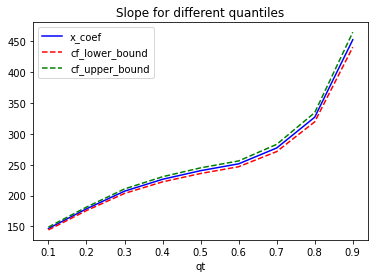

In [0]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])

plt.show()

The Mean squared error of our quantile regression is  88717793910.03 which is higher than our linear regression 57124654529.36715. Hence our linear model performed better than our quntile model

### 3. Ridge Regression

In [0]:
# Importing our libraries
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [0]:
#defining X and Y 
x = house_data[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', ]].values
y = house_data['price']

In [0]:
# Splitting the dataset into training and testing sets
#
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [0]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x_train,y_train)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 0.01}


54352223251.20365

In [0]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
rid_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(rid_model)

54502608084.30919


The ridge regression model gives us a mean squared error of 54502608084.30919 with an alpha of 0.01 but our best score was  54352223251.20365 which performed better than linear and quantile regression.

### 4. Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
from sklearn import linear_model
# Scaling data 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.5962211638019461
lasso MSE: 54496976371.08353
lasso coef: [ -27298.07889326  -13668.8352141   276829.17739073   -5478.18961825
   50851.23546457   47017.23705056  118090.49598034 -100565.88013322
  -33730.49949983    4209.75308589]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120354076024714.5, tolerance: 291664533601.623
  positive)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1000319974230359.0, tolerance: 200178620571.98236
  positive)


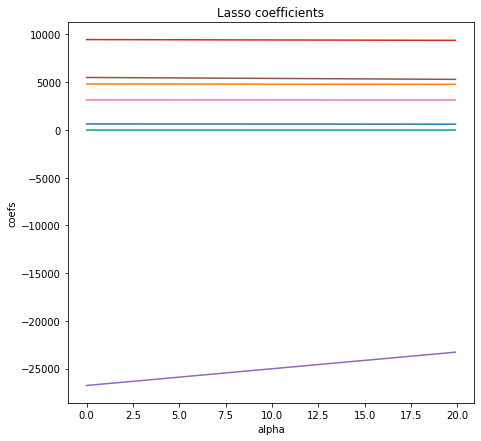

In [0]:
#Visualizing our lasso coefficients
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 



# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

The lasso regression model obtained a mean squared error of 54496976371.08353 which is slightly higher compared to ridge regression.

### 5. Elastic Net Regression

In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


54906130062.149025

In [0]:
# we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)
model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(x_test)))
print(model)

141943513355.5345


The Elastic Net regression has perfom the poorest with an RSE of 141943513355.5345. Hence it should not be considered in making the price predictions.

# 8. Challenging the solution

### Conclusion

From the above analysis we conclude that ridge regression model performed best compared to other models.

However we cannot fully depend on that our solution can therefore be challenged by further analysis of data to be done to further improve the model.

# 9. Follow up questions

### a). Did we have the right data?

My data was absolutely right to answer the prediction question

### b). Do we need other data to answer our question?

Yes , more informatives features would have boosted our predictions.

### c). Did we have the right question?

The questions were right the data given was not enough to answer them accurately. Probably more data needs to be sought so as to improve the model and provide meaningful predictions.